In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Already loaded these files
subject = pd.read_csv('subject-info.csv')
subject = subject.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])
subject = subject.iloc[:80]

# Let's find all subject-specific CSV files
subject_files = glob.glob('Processed_Dataset/*.csv')
print(f"Found {len(subject_files)} subject data files")

# Let's see the first few file names to understand the naming pattern
for file in subject_files[:5]:
    print(file)

# Function to load all subject data files and organize them by subject ID
def load_subject_data(file_paths):
    all_data = pd.DataFrame()
    
    for file_path in file_paths:
        # Extract subject ID from filename (assuming format like "subject_001.csv")
        subject_id = os.path.basename(file_path).split('.')[0][-2:]
        
        subject_id = int(subject_id)
        
        # Load the data
        df = pd.read_csv(file_path)
        
        # replace column names
        # df.rename(columns={
        #     'Time [s]': 'Time', 
        #     'Pressure [cmH2O]' : 'Pressure', 
        #     'Flow [L/s]':'Flow',
        #     'V_tidal [L]' : 'V_tidal',
        #     'Chest [mm]' : 'Chest',
        #     'Abd [mm]' : 'Abd',
        #     'Time (Aeration Data)_[s]' : 'Time (Aeration Data)',
        # }, inplace=True)
        
        df['id'] = np.repeat(subject_id, len(df))
        
        all_data = pd.concat([all_data, df])
        
    return all_data

all_subject_data = load_subject_data(subject_files)

# all_subject_data

Found 80 subject data files
Processed_Dataset\ProcessedData_Subject01.csv
Processed_Dataset\ProcessedData_Subject02.csv
Processed_Dataset\ProcessedData_Subject03.csv
Processed_Dataset\ProcessedData_Subject04.csv
Processed_Dataset\ProcessedData_Subject05.csv


In [2]:
# merge the subject data with the subject info

all_subject_data = pd.merge(all_subject_data, subject, left_on='id', right_on='Subject Number')
all_subject_data = all_subject_data.drop(columns=['id'])
# all_subject_data['Time'] = all_subject_data['Time'].round(3)
all_subject_data['Time [s]'] = all_subject_data['Time [s]'].round(1)
all_subject_data

,Time [s],Pressure [cmH2O],Flow [L/s],V_tidal [L],Chest [mm],Abd [mm],Inspiratory Indicies,Time (Aeration Data)_[s],Global Aeration,Inspiratory Indicies (Aeration Data),...,Smoking Frequency,Time as a smoker,History of Vaping (Y/N),Current Vaper (Y/N),How long since you quit vaping,Vaping Frequency,Time as a vaper,Trial Classification,Chest Depth [mm],Chest Width [mm]
0,-0.0,-3.400773,0.713827,0.299421,830.612330,735.557369,407,0.02,3876.637580,203.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Normal Female,20.0,28.0
1,0.0,-3.400773,0.713827,0.306559,830.644927,735.557369,929,0.04,3965.719724,464.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Normal Female,20.0,28.0
2,0.0,-3.282765,0.659553,0.313426,830.710121,735.557369,1355,0.06,4075.263814,677.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Normal Female,20.0,28.0
3,0.0,-3.400773,0.739471,0.320421,830.742718,735.557369,1767,0.08,4176.425315,883.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Normal Female,20.0,28.0
4,0.0,-3.325677,0.739471,0.327816,830.775315,735.655851,2150,0.10,4277.385426,1075.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Normal Female,20.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518292,1198.0,-0.225288,0.193579,5.549873,797.298102,705.126565,0,0.00,0.000000,0.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Asthmatic Female,23.0,27.0
9518293,1198.0,-0.225288,0.193579,5.551809,797.298102,705.126565,0,0.00,0.000000,0.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Asthmatic Female,23.0,27.0
9518294,1198.0,-0.225288,0.193579,5.553745,797.298102,705.126565,0,0.00,0.000000,0.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Asthmatic Female,23.0,27.0
9518295,1198.0,-0.225288,0.273390,5.556080,797.298102,705.126565,0,0.00,0.000000,0.0,...,NaN,NaN,N,NaN,NaN,NaN,NaN,Asthmatic Female,23.0,27.0


In [6]:
sum(all_subject_data['Abd [mm]'] < 0)

0

In [ ]:
all_subject_data['group'] = all_subject_data['Trial Classification'].str.replace('Female', '').str.replace('Male', '').str.strip().replace('Asthmatic', 'asthma').str.lower()
all_subject_data = all_subject_data[
    (all_subject_data['V_tidal [L]'] >= 0) & 
    (all_subject_data['V_tidal [L]'] <= 2.5)
]
all_subject_data.groupby(['group', 'Time [s]'])[list(filter(lambda x: 'Time' not in x, pd.read_csv(subject_files[0]).columns))].mean().to_csv('grouped_data.csv')

In [14]:
all_subject_data['V_tidal'].max()

np.float64(41.159332627664)

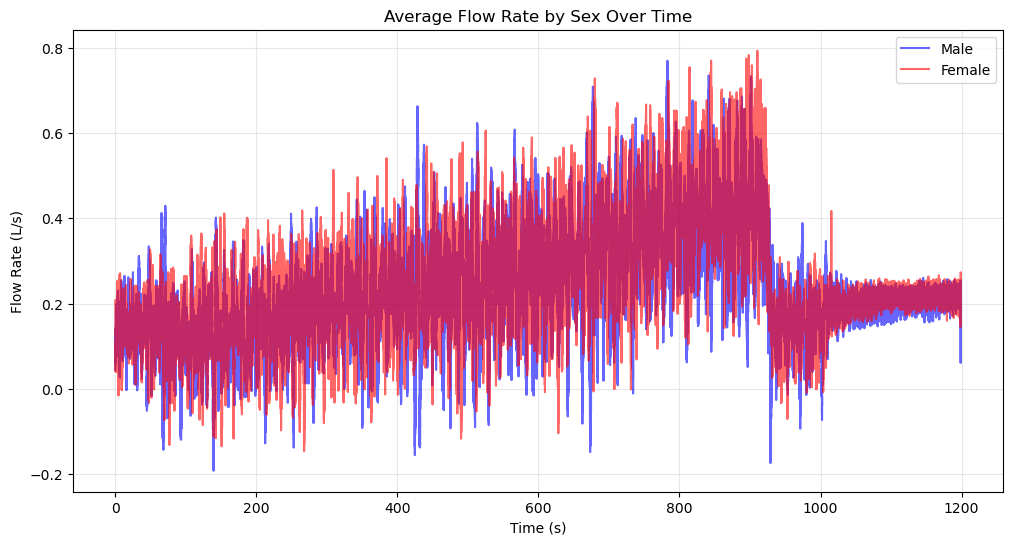

In [4]:
# Calculate mean flow for both males and females
flow_male = all_subject_data[all_subject_data['Sex (M/F)'] == 'M'].groupby('Time')['Flow'].mean()
flow_female = all_subject_data[all_subject_data['Sex (M/F)'] == 'F'].groupby('Time')['Flow'].mean()

# Create a figure for comparison
plt.figure(figsize=(12, 6))
plt.plot(flow_male.index, flow_male.values, label='Male', color='blue', alpha=0.6)
plt.plot(flow_female.index, flow_female.values, label='Female', color='red', alpha=0.6)

# Customize the plot
plt.title('Average Flow Rate by Sex Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Flow Rate (L/s)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

In [5]:
all_subject_data.columns

Index(['Time', 'Pressure', 'Flow', 'V_tidal', 'Chest', 'Abd',
       'Inspiratory Indicies', 'Time (Aeration Data)', 'Global Aeration',
       'Inspiratory Indicies (Aeration Data)', 'Subject Number', 'Sex (M/F)',
       'Height [cm]', 'Weight [kg]', 'Age [years]', 'Asthma (Y/N)',
       'Medication', 'Dosage Frequency', 'History of Smoking (Y/N)',
       'Current Smoker (Y/N)', 'How long since you quit smoking',
       'Smoking Frequency', 'Time as a smoker ', 'History of Vaping (Y/N)',
       'Current Vaper (Y/N)', 'How long since you quit vaping',
       'Vaping Frequency', 'Time as a vaper', 'Trial Classification ',
       'Chest Depth [mm]', 'Chest Width [mm]'],
      dtype='object')

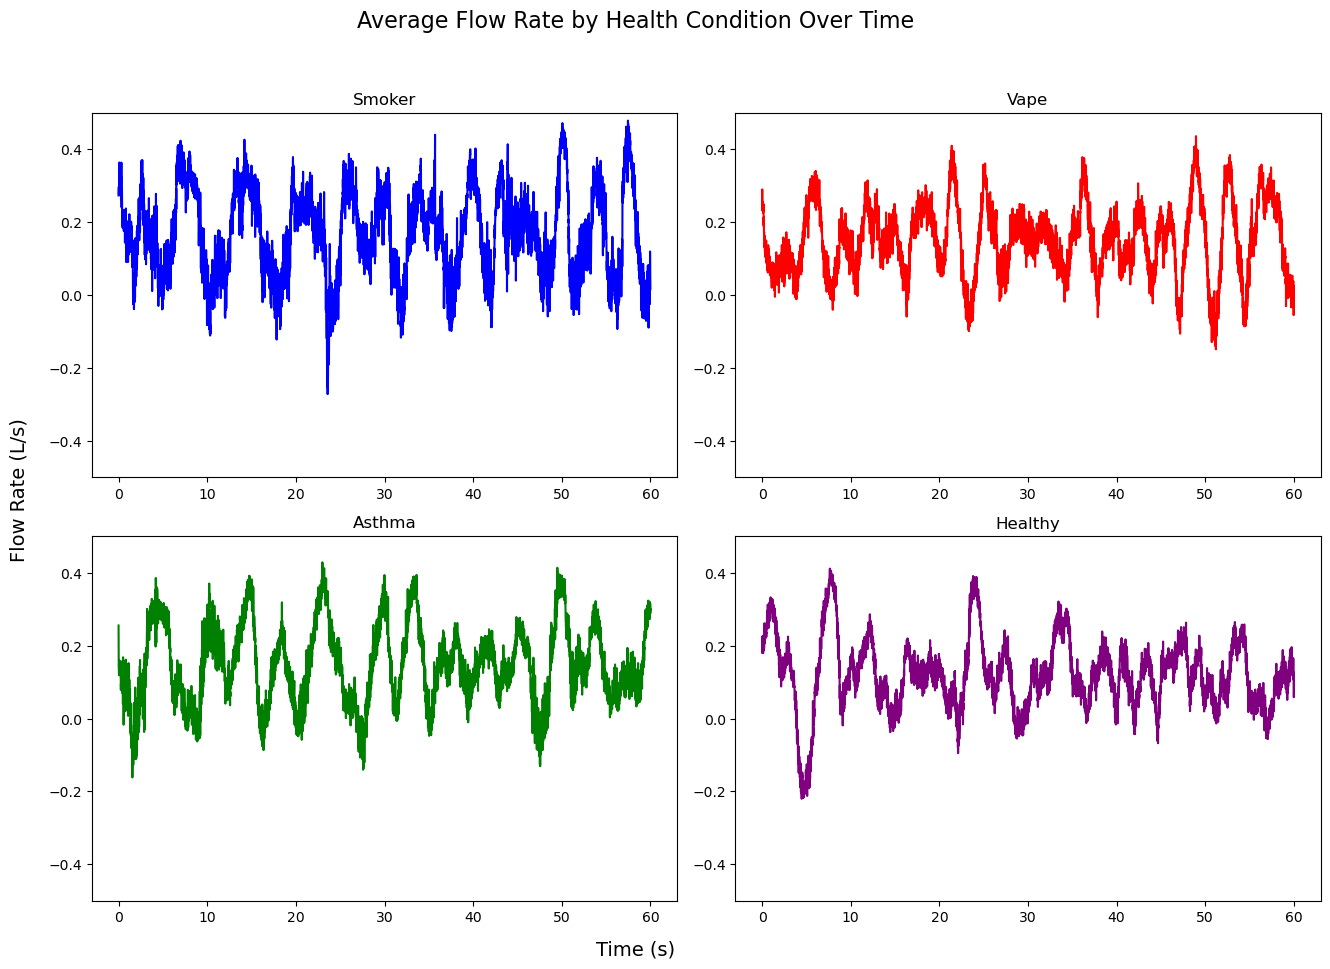

In [6]:
# Calculate mean flow for smoker, vape, asthma, and healthy
flow_condition = all_subject_data[all_subject_data['Time'] <= 60.0].groupby(['History of Smoking (Y/N)', 'History of Vaping (Y/N)', 'Asthma (Y/N)', 'Time'])['Flow'].mean()

flow_smoker = flow_condition['Y', 'N', 'N']
flow_vape = flow_condition['N', 'Y', 'N']
flow_asthma = flow_condition['N', 'N', 'Y']
flow_healthy = flow_condition['N', 'N', 'N']

# Create a figure with 2x2 subplots for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each condition in its own subplot
axes[0].plot(flow_smoker.index, flow_smoker.values, color='blue')
axes[0].set_title('Smoker')
axes[0].set_ylim(-0.5, 0.5)

axes[1].plot(flow_vape.index, flow_vape.values, color='red')
axes[1].set_title('Vape')
axes[1].set_ylim(-0.5, 0.5)

axes[2].plot(flow_asthma.index, flow_asthma.values, color='green')
axes[2].set_title('Asthma')
axes[2].set_ylim(-0.5, 0.5)

axes[3].plot(flow_healthy.index, flow_healthy.values, color='purple')
axes[3].set_title('Healthy')
axes[3].set_ylim(-0.5, 0.5)

# Add common labels
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Flow Rate (L/s)', ha='center', va='center', rotation='vertical', fontsize=14)

# Add a main title
fig.suptitle('Average Flow Rate by Health Condition Over Time', fontsize=16)

plt.tight_layout(rect=[0.07, 0.05, 1, 0.95])
plt.show()

In [7]:
# compare te statstics of each flow condition
pd.DataFrame({
    'Smoker': flow_smoker.describe(),
    'Vape': flow_vape.describe(),
    'Asthma': flow_asthma.describe(),
    'Healthy': flow_healthy.describe(),
})

,Smoker,Vape,Asthma,Healthy
count,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.167415,0.148722,0.146782,0.118876
std,0.120631,0.097453,0.108254,0.098291
min,-0.271836,-0.148892,-0.161608,-0.220164
25%,0.073698,0.080020,0.067362,0.059651
50%,0.165772,0.150634,0.140886,0.115393
75%,0.264356,0.214593,0.223557,0.171667
max,0.478672,0.436008,0.428683,0.411414


In [8]:
# conduct a t-test to compare the flow rate between partcipants with conditions and healthy participants
from scipy.stats import ttest_ind

for condition in [flow_smoker, flow_vape, flow_asthma]:
    stat, p = ttest_ind(flow_healthy, condition)
    print(f't-statistic: {stat:.4f}')
    print(f'p-value: {p:.4f}')

t-statistic: -24.1669
p-value: 0.0000
t-statistic: -16.7057
p-value: 0.0000
t-statistic: -14.7860
p-value: 0.0000


In [9]:
# conduct a levene-test to compare the variance of flow difference between partcipants with conditions and healthy participants
from scipy.stats import levene

stat, p = levene(flow_healthy, flow_smoker, flow_vape, flow_asthma)
print(f'Levene test statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')

Levene test statistic: 229.0910
p-value: 0.0000


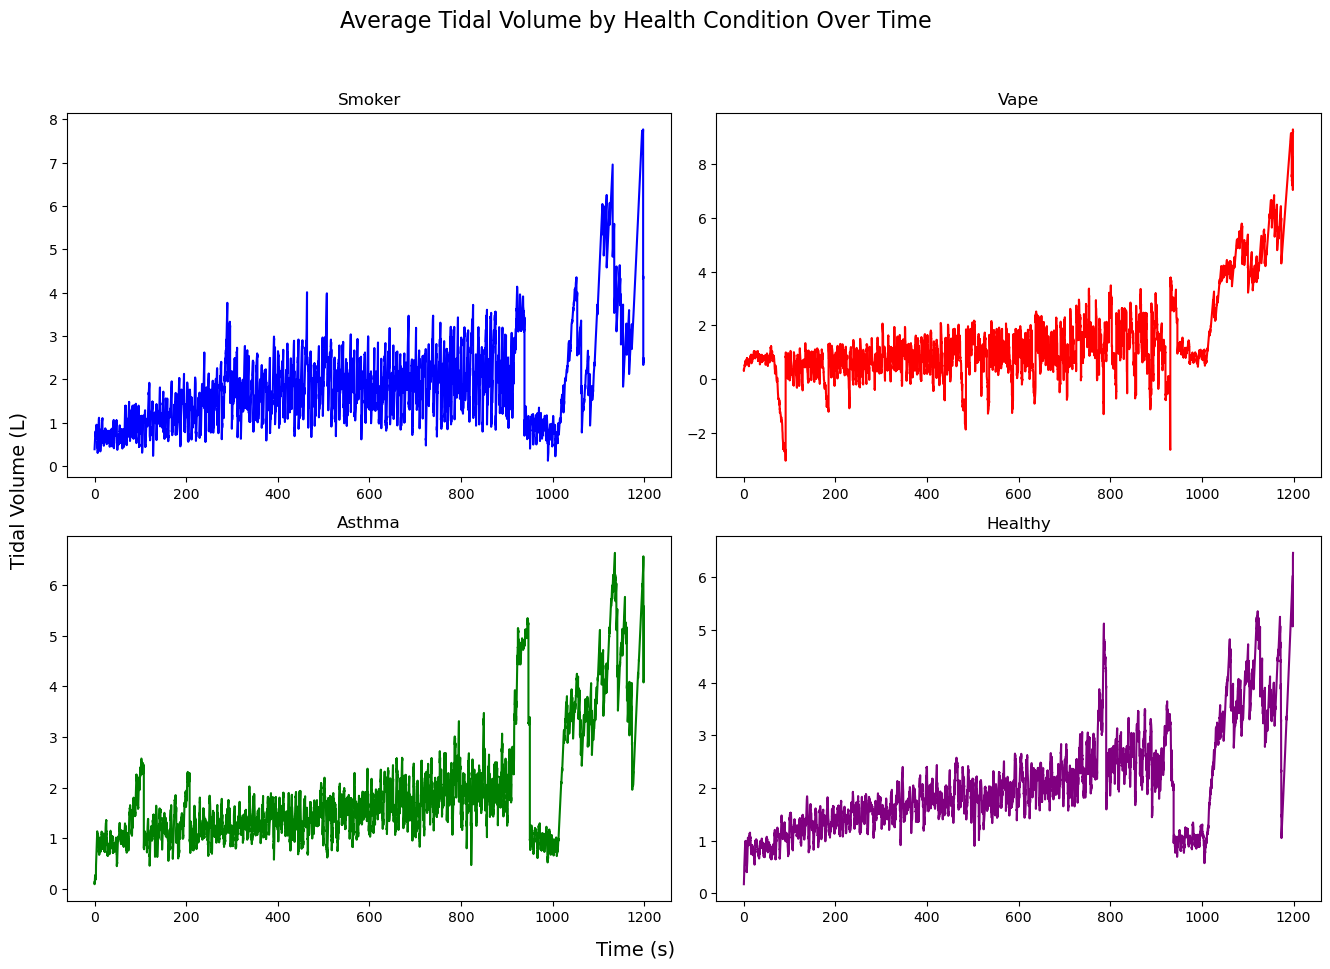

In [26]:
# Calculate mean flow for smoker, vape, asthma, and healthy
tidal_condition = all_subject_data[all_subject_data['Time'] > -10].groupby(['History of Smoking (Y/N)', 'History of Vaping (Y/N)', 'Asthma (Y/N)', 'Time'])['V_tidal'].mean()

tidal_smoker = tidal_condition['Y', 'N', 'N']
tidal_vape = tidal_condition['N', 'Y', 'N']
tidal_asthma = tidal_condition['N', 'N', 'Y']
tidal_healthy = tidal_condition['N', 'N', 'N']

# Create a figure with 2x2 subplots for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each condition in its own subplot
axes[0].plot(tidal_smoker.index, tidal_smoker.values, color='blue')
axes[0].set_title('Smoker')
# axes[0].set_ylim(0, 1.5)

axes[1].plot(tidal_vape.index, tidal_vape.values, color='red')
axes[1].set_title('Vape')
# axes[1].set_ylim(0, 1.5)

axes[2].plot(tidal_asthma.index, tidal_asthma.values, color='green')
axes[2].set_title('Asthma')
# axes[2].set_ylim(0, 1.5)

axes[3].plot(tidal_healthy.index, tidal_healthy.values, color='purple')
axes[3].set_title('Healthy')
# axes[3].set_ylim(0, 1.5)

# Add common labels
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Tidal Volume (L)', ha='center', va='center', rotation='vertical', fontsize=14)

# Add a main title
fig.suptitle('Average Tidal Volume by Health Condition Over Time', fontsize=16)

plt.tight_layout(rect=[0.07, 0.05, 1, 0.95])
plt.show()

In [23]:
# conduct a levene-test to compare the variance of tidal difference between partcipants with conditions and healthy participants
from scipy.stats import levene

stat, p = levene(tidal_healthy, tidal_smoker, tidal_vape, tidal_asthma)
print(f'Levene test statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')

from scipy.stats import fligner

stat, p = fligner(tidal_healthy, tidal_smoker, tidal_vape, tidal_asthma)
print(f'Fligner test statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')

Levene test statistic: 169.3564
p-value: 0.0000
Fligner test statistic: 379.3884
p-value: 0.0000


In [12]:
# Calculate mean flow for smoker, vape, asthma, and healthy
pressure_condition = all_subject_data[all_subject_data['Time'] <= 60.0].groupby(['History of Smoking (Y/N)', 'History of Vaping (Y/N)', 'Asthma (Y/N)', 'Time'])['Pressure'].mean()

pressure_smoker = pressure_condition['Y', 'N', 'N']
pressure_vape = pressure_condition['N', 'Y', 'N']
pressure_asthma = pressure_condition['N', 'N', 'Y']
pressure_healthy = pressure_condition['N', 'N', 'N']

# compare the pressure of each condition
pd.DataFrame({
    'Smoker': pressure_smoker.describe(),
    'Vape': pressure_vape.describe(),
    'Asthma': pressure_asthma.describe(),
    'Healthy': pressure_healthy.describe(),
})

,Smoker,Vape,Asthma,Healthy
count,6002.000000,6002.000000,6002.000000,6002.000000
mean,-0.331693,-0.336569,-0.292470,-0.327511
std,0.508369,0.394055,0.487562,0.434607
min,-1.652111,-1.411143,-1.501248,-1.573062
25%,-0.718775,-0.590658,-0.622056,-0.593992
50%,-0.302172,-0.339995,-0.253784,-0.323816
75%,0.067944,-0.055290,0.086494,-0.046300
max,1.516223,0.672562,1.121745,1.082962


In [13]:
# conduct a levene-test to compare the variance of chest difference between partcipants with conditions and healthy participants
from scipy.stats import levene

stat, p = levene(pressure_healthy, pressure_smoker, pressure_vape, pressure_asthma)
print(f'Levene-statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')

from scipy.stats import fligner

stat, p = fligner(pressure_healthy, pressure_smoker, pressure_vape, pressure_asthma)
print(f'Fligner-statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')

Levene-statistic: 226.1893
p-value: 0.0000
Fligner-statistic: 658.6661
p-value: 0.0000


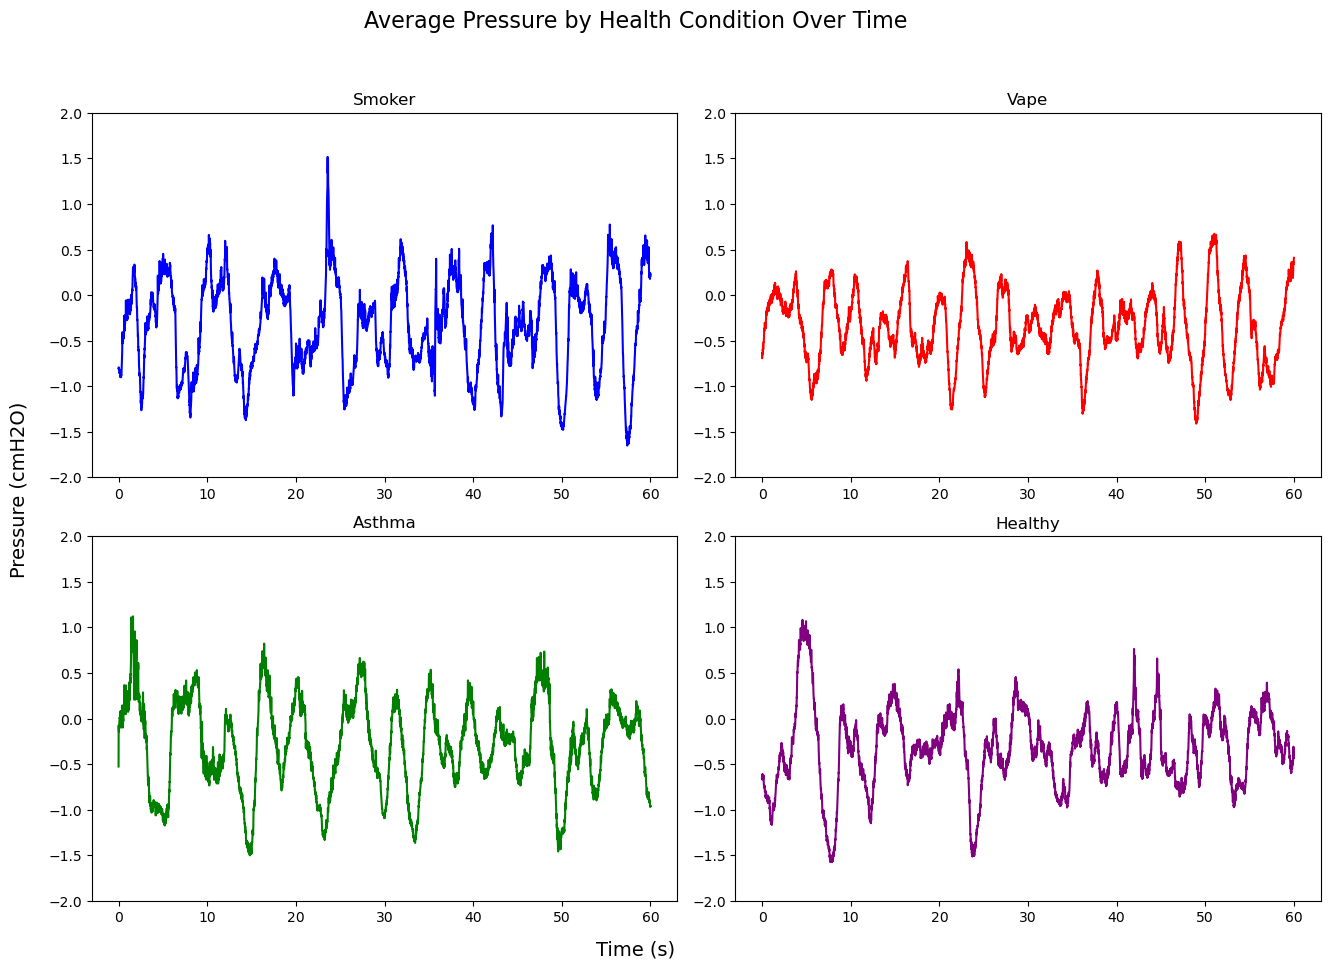

In [14]:
# Create a figure with 2x2 subplots for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each condition in its own subplot
axes[0].plot(pressure_smoker.index, pressure_smoker.values, color='blue')
axes[0].set_title('Smoker')
axes[0].set_ylim(-2, 2)

axes[1].plot(pressure_vape.index, pressure_vape.values, color='red')
axes[1].set_title('Vape')
axes[1].set_ylim(-2, 2)

axes[2].plot(pressure_asthma.index, pressure_asthma.values, color='green')
axes[2].set_title('Asthma')
axes[2].set_ylim(-2, 2)

axes[3].plot(pressure_healthy.index, pressure_healthy.values, color='purple')
axes[3].set_title('Healthy')
axes[3].set_ylim(-2, 2)

# Add common labels
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Pressure (cmH2O)', ha='center', va='center', rotation='vertical', fontsize=14)

# Add a main title
fig.suptitle('Average Pressure by Health Condition Over Time', fontsize=16)

plt.tight_layout(rect=[0.07, 0.05, 1, 0.95])
plt.show()

In [15]:
# calculate the difference in chest and abdomen expansion for each subject
all_subject_data[['Chest Diff', 'Abd Diff']] = all_subject_data.groupby('Subject Number')[['Chest', 'Abd']].diff().rename(columns={'Chest': 'Chest Diff', 'Abd': 'Abd Diff'}).fillna(0)

In [16]:
# Calculate mean flow for smoker, vape, asthma, and healthy
chest_condition = all_subject_data[all_subject_data['Time'] <= 120.0].groupby(['History of Smoking (Y/N)', 'History of Vaping (Y/N)', 'Asthma (Y/N)', 'Time'])['Chest Diff'].mean()

chest_smoker = chest_condition['Y', 'N', 'N']
chest_vape = chest_condition['N', 'Y', 'N']
chest_asthma = chest_condition['N', 'N', 'Y']
chest_healthy = chest_condition['N', 'N', 'N']

# compare the pressure of each condition
pd.DataFrame({
    'Smoker': chest_smoker.describe(),
    'Vape': chest_vape.describe(),
    'Asthma': chest_asthma.describe(),
    'Healthy': chest_healthy.describe(),
})

,Smoker,Vape,Asthma,Healthy
count,12002.000000,12002.000000,12002.000000,1.200200e+04
mean,-0.000193,0.000174,-0.000097,9.630247e-05
std,0.011939,0.008414,0.009768,8.893978e-03
min,-0.081493,-0.069767,-0.040559,-4.232172e-02
25%,-0.005433,-0.004980,-0.006098,-5.159020e-03
50%,0.000000,0.000000,-0.000014,-4.188462e-14
75%,0.005433,0.004980,0.006083,5.159020e-03
max,0.065233,0.062280,0.040559,3.750179e-02


In [17]:
# conduct a levene-test to compare the variance of chest difference between partcipants with conditions and healthy participants
from scipy.stats import levene

stat, p = levene(chest_healthy, chest_smoker, chest_vape, chest_asthma)
print(f'Levene-statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')

from scipy.stats import fligner

stat, p = fligner(chest_healthy, chest_smoker, chest_vape, chest_asthma)
print(f'Fligner-statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')

Levene-statistic: 379.5433
p-value: 0.0000
Fligner-statistic: 1395.4015
p-value: 0.0000


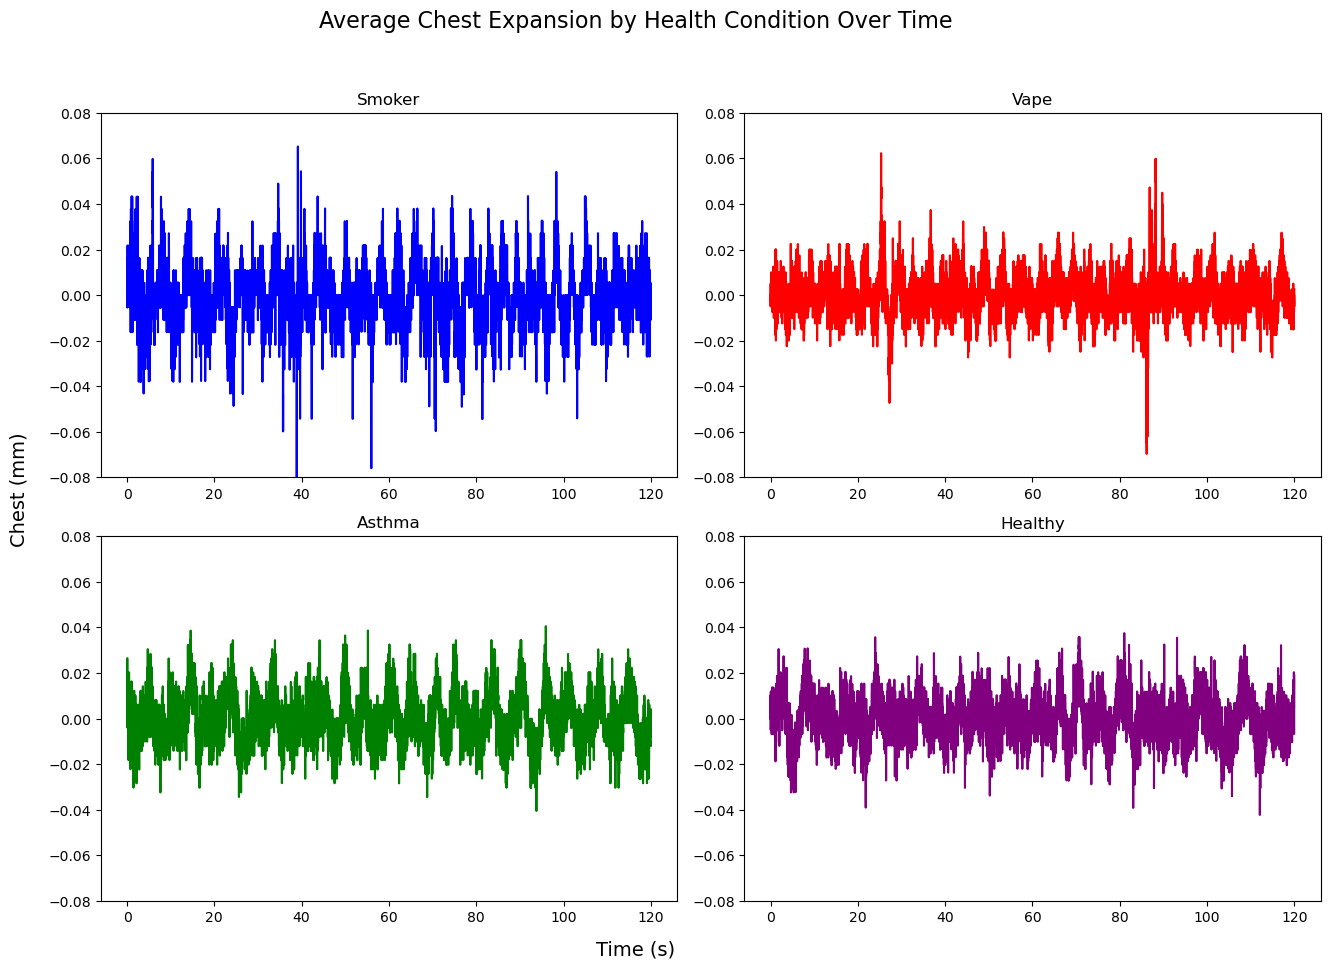

In [18]:
# graph line plot for each condition of chest

# Create a figure with 2x2 subplots for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each condition in its own subplot
axes[0].plot(chest_smoker.index, chest_smoker.values, color='blue')
axes[0].set_title('Smoker')
axes[0].set_ylim(-0.08, 0.08)

axes[1].plot(chest_vape.index, chest_vape.values, color='red')
axes[1].set_title('Vape')
axes[1].set_ylim(-0.08, 0.08)

axes[2].plot(chest_asthma.index, chest_asthma.values, color='green')
axes[2].set_title('Asthma')
axes[2].set_ylim(-0.08, 0.08)

axes[3].plot(chest_healthy.index, chest_healthy.values, color='purple')
axes[3].set_title('Healthy')
axes[3].set_ylim(-0.08, 0.08)

# Add common labels
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Chest (mm)', ha='center', va='center', rotation='vertical', fontsize=14)

# Add a main title
fig.suptitle('Average Chest Expansion by Health Condition Over Time', fontsize=16)

plt.tight_layout(rect=[0.07, 0.05, 1, 0.95])
plt.show()

In [19]:
all_subject_data[all_subject_data['History of Smoking (Y/N)'] == 'Y']['Time as a smoker '].value_counts()

Time as a smoker 
5 years      941964
3 years      599019
2 years      239647
4 years      239634
10 years     239553
1 year       227441
9 years      119882
3 months     119802
2.5 years    119794
3 weeks      119782
5  years     119757
3 years      119747
7 years      114767
Name: count, dtype: int64

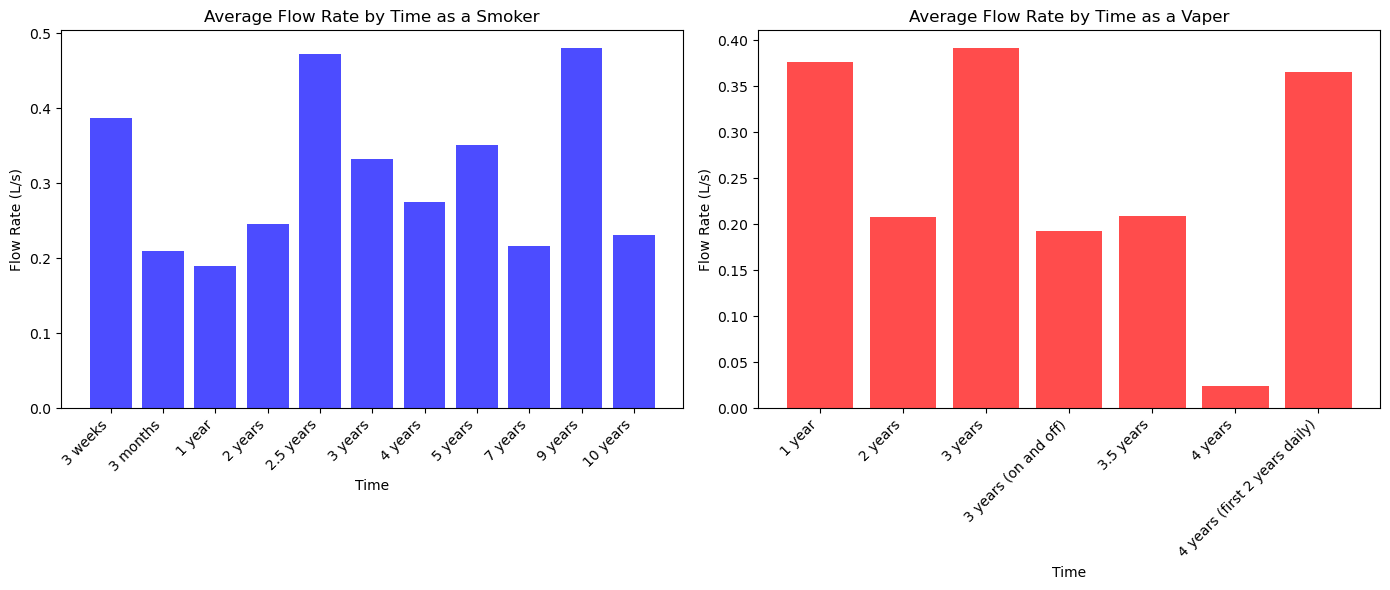

In [20]:
# Graph a bar plot for time as a smoker/vaper vs flow rate

all_subject_data['Time as a smoker '] = all_subject_data['Time as a smoker '].str.strip()
all_subject_data['Time as a vaper'] = all_subject_data['Time as a vaper'].str.strip()

all_subject_data['Time as a smoker '] = all_subject_data['Time as a smoker '].replace('5  years', '5 years')
all_subject_data['Time as a vaper'] = all_subject_data['Time as a vaper'].replace('1  year', '1 year')

smoker_data = all_subject_data[all_subject_data['History of Smoking (Y/N)'] == 'Y'].groupby('Time as a smoker ')['Flow'].mean()
vaper_data = all_subject_data[all_subject_data['History of Vaping (Y/N)'] == 'Y'].groupby('Time as a vaper')['Flow'].mean()

smoker_data = smoker_data[['3 weeks', '3 months', '1 year', '2 years', '2.5 years', '3 years', '4 years', '5 years', '7 years', '9 years', '10 years']]
vaper_data = vaper_data[['1 year', '2 years', '3 years', '3 years (on and off)', '3.5 years', '4 years', '4 years (first 2 years daily)']]
# smoker_data = smoker_data.sort_index()
vaper_data = vaper_data.sort_index()

# Create a figure with subplots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot smoker data
ax1.bar(x=smoker_data.index, height=smoker_data.values, color='blue', alpha=0.7)
ax1.set_xticks(range(len(smoker_data)))
ax1.set_xticklabels(smoker_data.index, rotation=45, ha='right')
ax1.set_title('Average Flow Rate by Time as a Smoker')
ax1.set_xlabel('Time')
ax1.set_ylabel('Flow Rate (L/s)')

# Plot vaper data
ax2.bar(range(len(vaper_data)), vaper_data.values, color='red', alpha=0.7)
ax2.set_xticks(range(len(vaper_data)))
ax2.set_xticklabels(vaper_data.index, rotation=45, ha='right')
ax2.set_title('Average Flow Rate by Time as a Vaper')
ax2.set_xlabel('Time')
ax2.set_ylabel('Flow Rate (L/s)')

plt.tight_layout()
plt.show()